<a href="https://colab.research.google.com/github/vitaldb/examples/blob/master/asa_mortality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparison of mortality rates depending on ASA physical status class
In this example, we will learn how to estimate and compare mortality rates depending on ASA physical status class with <code>VitalDB</code> dataset.<br>

> Note that <b>all users who use Vital DB, an open biosignal dataset, must agree to the Data Use Agreement below. </b> If you do not agree, please close this window. Click here: [Data Use Agreement](https://vitaldb.net/dataset/?query=overview&documentId=13qqajnNZzkN7NZ9aXnaQ-47NWy7kx-a6gbrcEsi-gak&sectionId=h.vcpgs1yemdb5)

## Preparation

In [13]:
import pandas as pd

# Load clinical information data
df_cases = pd.read_csv("https://api.vitaldb.net/cases")
df_cases.to_csv('vital_test.csv')

# Print the average of death in hospital
print(df_cases.death_inhosp.mean() * 100)

df_cases[['age', 'sex', 'bmi']].sample(30)

0.8922980588603632


,age,sex,bmi
5376,77.0,M,22.0
879,54.0,F,23.9
4919,50.0,F,27.9
1869,70.0,F,27.0
969,61.0,F,19.6
6213,60.0,F,24.3
5074,25.0,F,23.8
3273,62.0,F,22.6
8,32.0,F,20.4
4502,50.0,F,21.3


## Data Visualization

[0.5451241671714113, 0.2991325157044571, 1.3671875, 18.181818181818183]
[0.0, 1.9662921348314606, 5.2356020942408374, 27.027027027027028]


<module 'matplotlib.pyplot' from 'C:\\Users\\admin\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

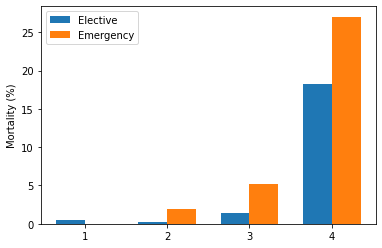

In [2]:
##########################################################
# column name'asa' stands for ASA class
# column name'emop' stands for emergency surgery
# column name 'death_inhosp' stands for death in hospital
##########################################################

# Estimate patients' mortality rate depending on ASA class in emergency surgery
el_y = [df_cases[(df_cases['asa'] == asa) & ~df_cases['emop']]['death_inhosp'].mean() * 100 for asa in range(1,5)]
print(el_y)

# Estimate patients' mortality rate depending on ASA class in general surgery
em_y = [df_cases[(df_cases['asa'] == asa) & df_cases['emop']]['death_inhosp'].mean() * 100 for asa in range(1,5)]
print(em_y)

# Draw a bar graph
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
w = 0.35
x = np.arange(1,5)
ax.bar(x - w/2, el_y, w, label='Elective')
ax.bar(x + w/2, em_y, w, label='Emergency')
ax.set_ylabel('Mortality (%)')
ax.set_xticks(x)
ax.legend()
plt